(1600, 2)


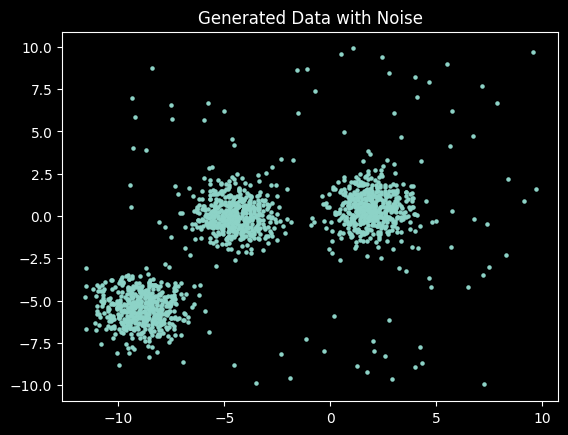

In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 生成样本数据
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state) # y没有用

# 增加一些噪声点，往X中拼接噪声点
rng = np.random.RandomState(74)
# rng.uniform 生成均匀分布的噪声数据
# low=-10, high=10: 噪声数据的范围
# size=(100, 2): 生成100个样本，每个样本2个特征
X = np.concatenate([X, rng.uniform(low=-10, high=10, size=(100, 2))])

print(X.shape) # 1600个样本，2列特征，100个噪声点

# 可视化生成的数据
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.title("Generated Data with Noise")
plt.show()

[-1  0  1  2]
131
[0 1 2]


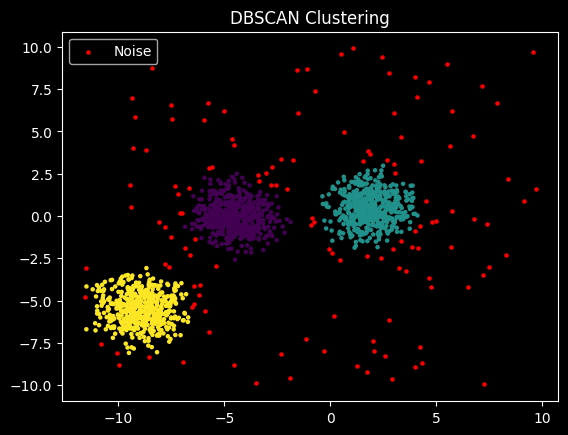

In [2]:
# --- 使用DBSCAN算法 ---
# eps是半径，min_samples是最少包含几个点才会被认为是核心点
db = DBSCAN(eps=0.5, min_samples=5).fit(X)

labels = db.labels_ # 得到每个点的类别
print(np.unique(labels)) # 得到类别有-1 0 1 2 总计4个类别

# --- 标签为-1的点是噪声点 ---
noise_mask = (labels == -1)
print(np.sum(noise_mask)) # 噪声点的数量,不一定和之前添加的一样
print(np.unique(labels[~noise_mask])) # 得到非噪声点的mask（实际上是打印非噪声点的标签类别）

# --- 可视化聚类结果 ---
# 正常点用彩色标注 (cmap='viridis')
plt.scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=labels[~noise_mask], s=5, cmap='viridis')

# 噪声点用红色标注 (c='red')
plt.scatter(X[noise_mask, 0], X[noise_mask, 1], c='red', s=5, label='Noise')

plt.title("DBSCAN Clustering")
plt.legend()
plt.show()